# Logistic Regression Project Exercise.

**PURPOSE: Create a classification model that can predict whether or not a person has heart disease based on that person's physical characteristics. (age,sex, cholesterol, etc...)**

**Complete the TASKS written in bold below.**

## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, average_precision_score, PrecisionRecallDisplay

## Data

This database contains 14 physical characteristics based on physical tests of a patient. Blood samples are taken and the patient also undergoes a short exercise test. The "target" field refers to the presence of heart disease in the patient. It is an integer (0 for no presence, 1 for presence). In general, it can confirm 100% whether a patient has heart disease is a fairly invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can avoid expensive and invasive procedures.

Contents

Information about the attributes:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (fasting blood sugar)
* resting electrocardiographic results (values ​​0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TAAK: Voer de cel hieronder uit om de gegevens in te lezen.**

In [3]:
df = pd.read_csv('../20 Machine learning/DATA/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0])

### Exploratory Data Analysis and Visualization.

Feel free to explore the data further on your own initiative.

**TAKE: Explore whether the dataset has missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [49]:
# CODE HERE
df.describe().T # T to make the features in the left

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Visualization tasks

**TASK: Create a bar graph showing total counts by target value.**

In [22]:
# CODE HERE!
df['target'].value_counts() # 0 and 1

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

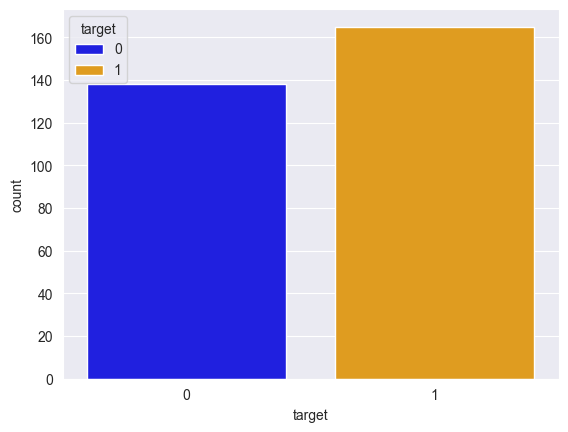

In [29]:
sns.countplot(x='target',hue='target', data=df, palette=['blue','orange'])

**TAKE: Create a pairplot that shows the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time because of the number of features*

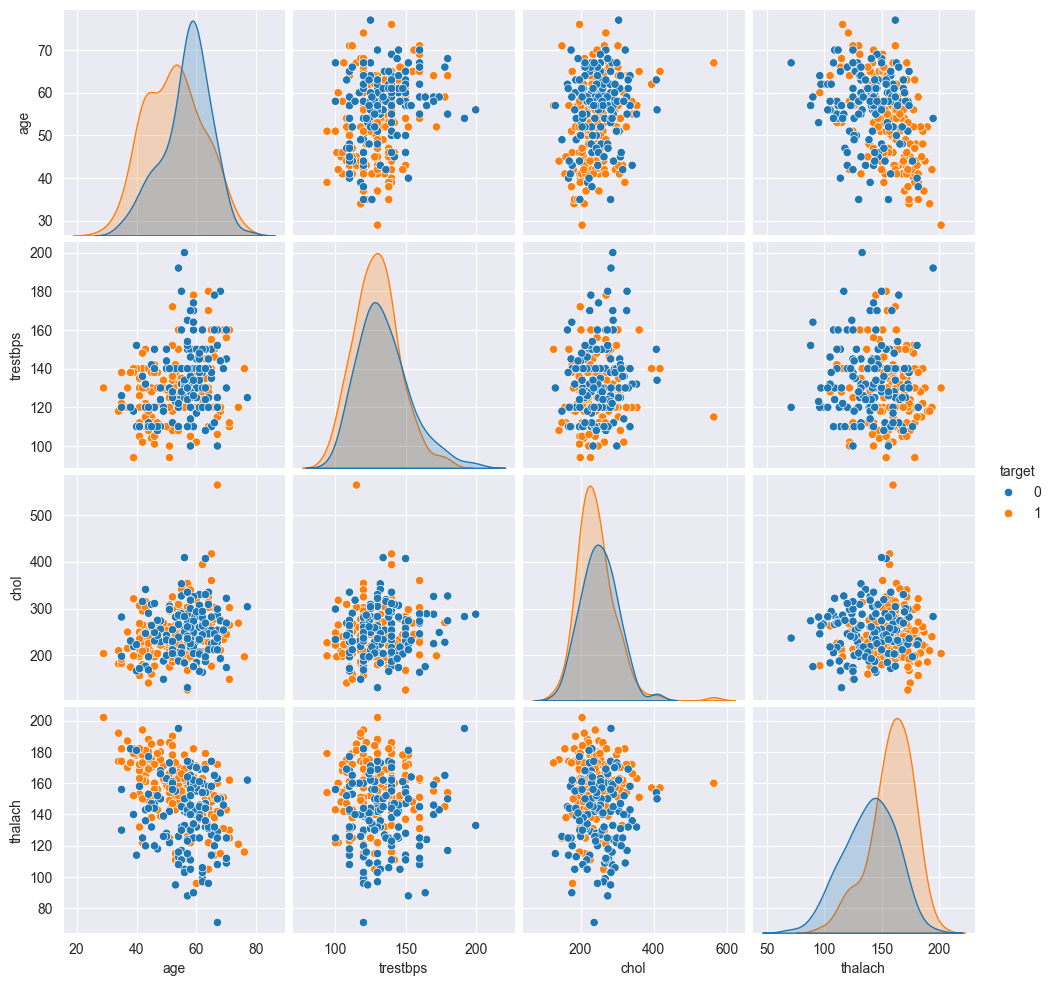

In [34]:
# CODE HERE
cols_to_pairplot = ['age','trestbps','chol','thalach', 'target']
sns.pairplot(df[cols_to_pairplot],hue='target')

**TASK: Create a heatmap that shows the correlation between all columns.**

<Axes: >

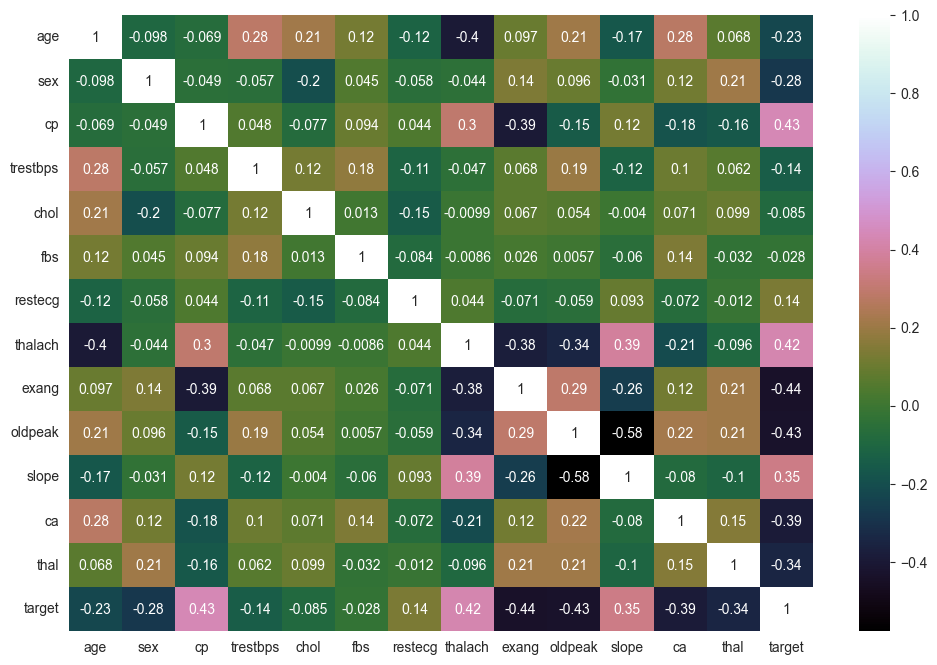

In [39]:
# CODE HERE
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='cubehelix')

----
----

# Machine Learning

## Train | Test Split and Scaling

**TAKE: Split the features and labels into 2 objects X and y.**

In [40]:
# CODE HERE
X = df.drop('target', axis=1)
Y = df['target']

**TASK: Perform a train-test split on the data, with a test size of 10% and a random_state of 101.**

In [42]:
# CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=101)

**TASK: Create a StandardScaler object and normalize the X train and test set attribute data. Make sure you only fit on the training data to avoid a data leak (knowledge leaks from the test set).**Take care.

In [43]:
# CODE HERE
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

## Logistic Regression Model

**TASK: Create a logistic regression model and use cross-validation to find a well-performing C-value for the hyperparameter search. You have two options here: use LogisticRegressionCV OR use a combination of LogisticRegression and GridSearchCV. The choice is yours.**

In [69]:
# CODE HERE
clf = LogisticRegressionCV(solver='saga', cv=5, max_iter=5000 , random_state=0)

In [48]:
# help(LogisticRegressionCV)

**TASK: Report the optimal parameters of your search, specifically the C value.**

*Note: Depending on how you performed your search, you may get a different value.*

In [70]:
# CODE HERE
clf.fit(scaler_X_train, Y_train)
print(clf.C_)

[0.04641589]


### Coëfficiënten

**TASK: Repport the coefficients of the model.**

In [75]:
coefficients = clf.coef_
print(coefficients)

[[-0.09620713 -0.3946052   0.53534982 -0.13853084 -0.08828978  0.02489956
   0.08083903  0.29913753 -0.33438283 -0.35238773  0.25100667 -0.49735787
  -0.37450202]]


**BONUS TASK: I didn't show this in the notebooks, but no doubt you can find it yourself! Make a visualization of the coefficients by using a bar graph of their values. Also figure out how to sort the plot! There are many ways to do this, the solutions use a combination of pandas and seaborn.**

In [33]:
#CODE HERE

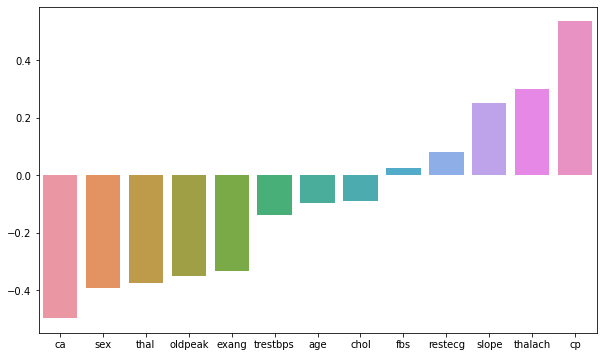

---------

## Evaluation of the model performance

**TASK: Now let's evaluate your model on the remaining 10% of the data, the test set.**

**TASK: Make the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [82]:
# CODE HERE
# Predict on the scaled test set
Y_pred = clf.predict(scaler_X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[12,  3],
       [ 2, 14]])

Text(0, 0.5, 'Actual')

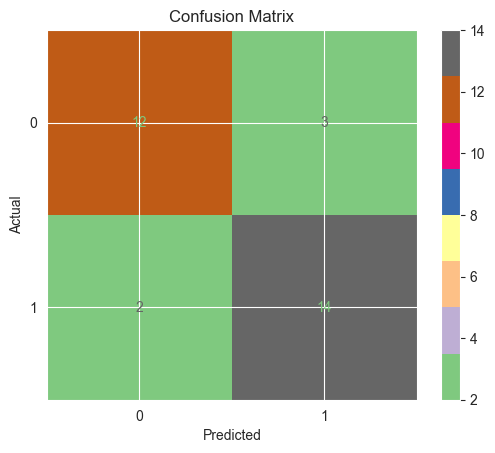

In [92]:
# CODE HERE 
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Accent')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [84]:
# CODE HERE
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves

**TASK: Create both the precision recall and the ROC Curve.**

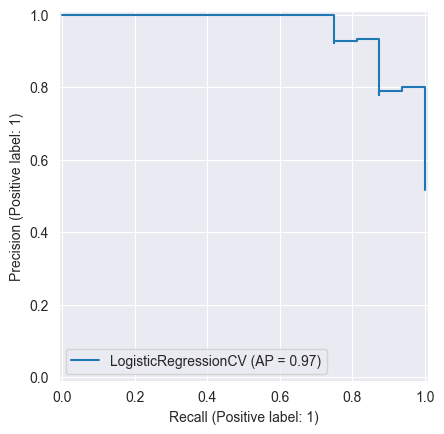

In [106]:
# CODE HERE
y_proba = clf.predict_proba(scaler_X_test)[:, 1]  # Probability for class 1

ap_score = average_precision_score(Y_test, y_proba)
disp = PrecisionRecallDisplay.from_estimator(clf, scaler_X_test, Y_test)


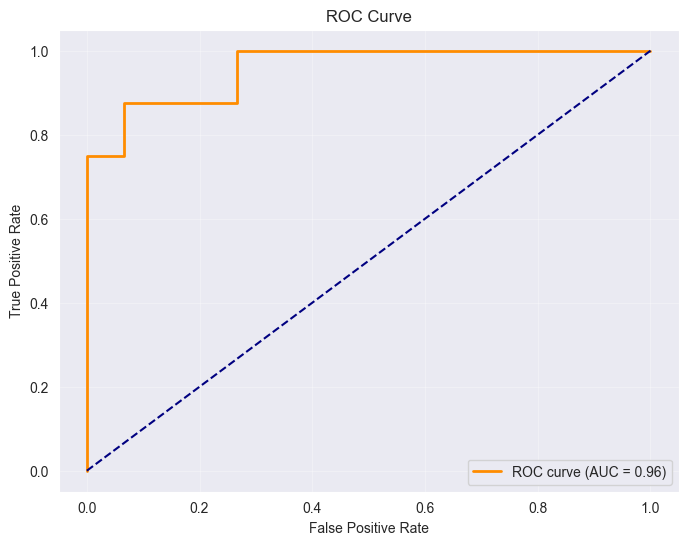

In [96]:
# CODE HERE
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

**Final task: A patient with the following characteristics entered the medical center:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**TAKE: What does your model predict for this patient? Do they have heart disease? How "certain" is your model of this prediction?**.

*For your convenience, I have created an array of the characteristics for the patient above.*

In [122]:
patient1 = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [123]:
# CODE HERE
# VERWACHTE UITKOMST
# EXPECTED LIKELY PER CLASS (Basically, the model should be extremely sure it is in class 0)

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
           'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Patient's characteristics array (as specified in the task)
patient = pd.DataFrame(patient1,
                       columns=columns)

# Scaling the patient data with the already fitted scaler
patient_scaled = scaler.transform(patient)

# Predicting the probability for each class
probability = clf.predict_proba(patient_scaled)

# Printing the exact expected probability array
print(probability)


[[0.94751209 0.05248791]]


In [120]:

patient = np.array([[48.0, 0.0, 2.0, 130.0, 275.0, 0.0, 1.0, 139.0, 0.0, 0.2, 2.0, 0.0, 2.0]])

patient_df = pd.DataFrame(patient, columns=X_train.columns)

patient_scaled = scaler.transform(patient_df)

# Make a prediction
prediction = clf.predict(patient_scaled)
prediction_probabilities = clf.predict_proba(patient_scaled)

print(f"Prediction: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")
print(f"Prediction Probabilities: {prediction_probabilities}")


Prediction: Heart Disease
Prediction Probabilities: [[0.07554219 0.92445781]]


----

## Je bent er!!